# Example 3.5

Recall that this example deals with rejection sampling from the posterior distribution.

In this example, we have a Gamma prior and a Poisson likelihood as described in the notes. Let us first plot the unnormalised posterior, posterior, and the described proposal in Example 3.5.

/var/folders/d8/86whr2t12h70n511w7s7cm_w0000gn/T/ipykernel_85395/1918633454.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (beta**alpha / np.math.factorial(alpha-1)) * x**(alpha-1) * np.exp(-beta * x)


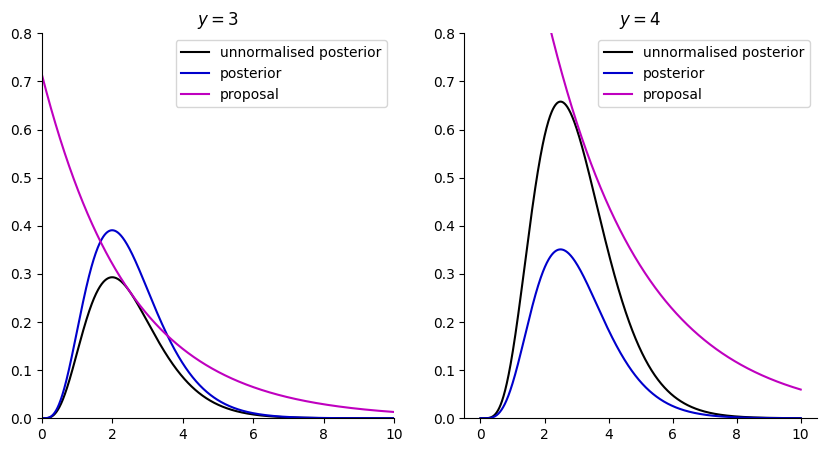

In [1]:
import numpy as np
import matplotlib.pyplot as plt

orange_rgb = [0.8, 0.4, 0]


def gamma(x, alpha, beta):
    return (beta**alpha / np.math.factorial(alpha-1)) * x**(alpha-1) * np.exp(-beta * x)

def exponential(x, lam):
    return lam * np.exp(-lam * x)

def Poisson(y, x):
    return np.exp(-x) * x**y / np.math.factorial(y)

def posterior_gamma(x, y, alpha, beta):
    return gamma(x, alpha + y, beta + 1)

def unnormalised_posterior_gamma(x, y, alpha, beta):
    return x**(alpha + y - 1) * np.exp(-beta * x) * np.exp(-x)

def M(x, y, alpha, lam):
    return ((alpha + y - 1)/(2 - lam))**(alpha + y - 1) * np.exp(-(alpha + y - 1)) / (lam)

alpha = 2
beta = 1
y1 = 3
y2 = 4

ylim_max = 0.8
xx = np.linspace(0, 10, 1000)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# ax[0].plot(xx, gamma(xx, alpha, beta), 'k-', label='prior')
# ax[0].plot(xx, Poisson(y1, xx), color=[0.8, 0, 0], label='likelihood')
ax[0].plot(xx, unnormalised_posterior_gamma(xx, y1, alpha, beta), color='k', label='unnormalised posterior')
ax[0].plot(xx, posterior_gamma(xx, y1, alpha, beta), color=[0, 0, 0.8], label='posterior')
ax[0].plot(xx, M(xx, y1, alpha, 2/(alpha + y1)) * exponential(xx, 2/(alpha + y1)), 'm-', label='proposal')
ax[0].set_title('$y = 3$')
ax[0].set_ylim([0, ylim_max])
ax[0].set_xlim([0, 10])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()
# ax[1].plot(xx, gamma(xx, alpha, beta), 'k-', label='prior')
# ax[1].plot(xx, Poisson(y2, xx), color=[0.8, 0, 0], label='likelihood')
ax[1].plot(xx, unnormalised_posterior_gamma(xx, y2, alpha, beta), color='k', label='unnormalised posterior')
ax[1].plot(xx, posterior_gamma(xx, y2, alpha, beta), color=[0, 0, 0.8], label='posterior')
ax[1].plot(xx, M(xx, y2, alpha, 2/(alpha + y1)) * exponential(xx, 2/(alpha + y2)), 'm-', label='proposal')
ax[1].set_title('$y = 4$')
ax[1].set_ylim([0, ylim_max])
ax[0].set_xlim([0, 10])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()
plt.show()

Next, we implement the rejection sampler as described in Example 3.5.

/var/folders/d8/86whr2t12h70n511w7s7cm_w0000gn/T/ipykernel_85395/1918633454.py:8: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (beta**alpha / np.math.factorial(alpha-1)) * x**(alpha-1) * np.exp(-beta * x)


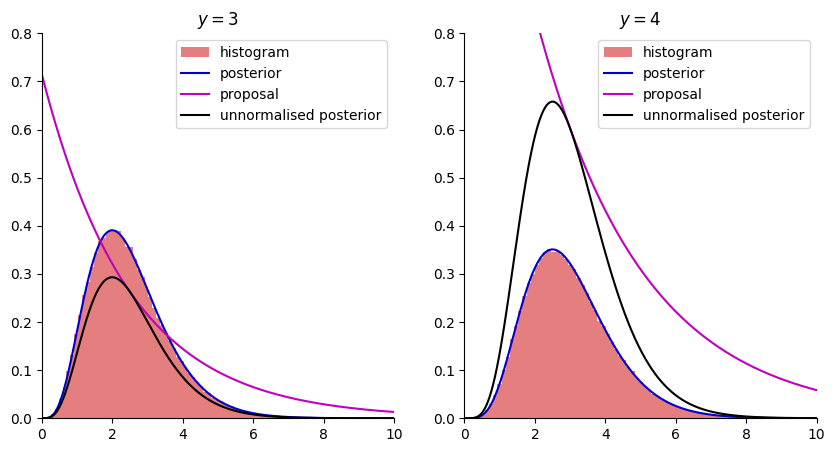

In [2]:
# rejection sampling

def rejection_sampling(N, y, alpha, beta, lam):
    x_accepted = np.array([])
    while len(x_accepted) < N:
        x = np.random.exponential(1/lam)
        u = np.random.uniform(0, 1)
        if u < unnormalised_posterior_gamma(x, y, alpha, beta) / (M(x, y, alpha, lam) * exponential(x, lam)):
            x_accepted = np.append(x_accepted, x)

    return x_accepted

N = 200000
lam_star = 2/(alpha + y1)
alpha = 2
samples_1 = rejection_sampling(N, y1, alpha, beta, lam_star)
lam_star_2 = 2/(alpha + y2)
samples_2 = rejection_sampling(N, y2, alpha, beta, lam_star_2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(samples_1, bins=100, density=True, color=[0.8, 0, 0], alpha = 0.5, label='histogram')
ax[0].plot(xx, posterior_gamma(xx, y1, alpha, beta), color=[0, 0, 0.8], label='posterior')
ax[0].plot(xx, M(xx, y1, alpha, 2/(alpha + y1)) * exponential(xx, 2/(alpha + y1)), 'm-', label='proposal')
ax[0].plot(xx, unnormalised_posterior_gamma(xx, y1, alpha, beta), color='k', label='unnormalised posterior')
ax[0].set_title('$y = 3$')
ax[0].set_ylim([0, ylim_max])
ax[0].set_xlim([0, 10])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].legend()
ax[1].hist(samples_2, bins=100, density=True, color=[0.8, 0, 0], alpha = 0.5, label='histogram')
ax[1].plot(xx, posterior_gamma(xx, y2, alpha, beta), color=[0, 0, 0.8], label='posterior')
ax[1].plot(xx, M(xx, y2, alpha, 2/(alpha + y2)) * exponential(xx, 2/(alpha + y2)), 'm-', label='proposal')
ax[1].plot(xx, unnormalised_posterior_gamma(xx, y2, alpha, beta), color='k', label='unnormalised posterior')
ax[1].set_title('$y = 4$')
ax[1].set_ylim([0, ylim_max])
ax[1].set_xlim([0, 10])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].legend()
plt.show()